#### selenium 패키지 모듈 이용한 자동 크롤링
- selenium
    - webdriver라는 API를 통해 운영체제에 설치된 웹 브라우저를 제어하는 함수를 포함한 패키지
    - 써드파티라이브러리이기 때문에 설치 해 줘야 함
    - prompt 에서 설치
        - pip install selenium

In [2]:
# # 노트북에서 패키지 설치
# !pip install selenium

In [3]:
# 패키지 임포트
import selenium
from selenium import webdriver
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By # 셀레니움 4.0부터 포함된 함수(필수)

In [4]:
selenium.__version__

'4.15.2'

- 자바스크립트는 코드가 생성된다. 기존의 크롤링은 이것까지 가져올수업ㄳ다., 하지만 셀레니움은 실행된 코드를 가져온다.,
- 이전의 크롤링은 클라이언트가 있고 서버측으로 직접 코드를 요청해서 서버가 보내준 로우코드를 이용했다면 셀레니움은 클
- 라이언트가 있고 클라이언트가 조정할 수 있는 웹드라이버(브라우저)가 있고 이 브라우저가 서버측으로 요청을 보낸다.
- 이 웹드라이버가 셀레니움이다.  정적: 서버-클라이언트 동적: 서버 - 웹드라이버 - 클라이언트
- 셀레니움은 이 웹드라이브를 제어하는 것이다.

- selenium은 브라우저를 컨트롤하는 기능이기 때문에 webdriver 프로그램을 사용
    - webdriver는 브라우저 종류에 따라 브라우저 제작 업체에서 제공
    - 브라우저 종류와 버전별로 웹드라이버가 다르게 제공됨
        - selenium 4.1 이전 버전에서는 드라이버를 직접 다운받아서 실행했어야 함

- selenium 4.10부터는 따로 드라이버 다운 없이 진행 가능
    - service = Service()
    - options = webdriver.ChromeOptions()
    - driver = webdriver.Chrome(service=service, options=options)
    - 위 코드를 순서대로 진행
    - drvier 객체 변수에 크롬브라우저를 핸들링할 수 있는 기능이 포함됨

###  **공식site : https://www.selenium.dev/documentation/webdriver/getting_started/upgrade_to_selenium_4/**
- By 패키지가 변경되어 after의 By.xxx는 아래 함수를 참고
### 관련 메서드
#### 서버에 접근해서 응답받도록 하는 요청메서드와 파싱메서드 모두 포함되어 있음
- 소스를 저장해서 bs4로 파싱할 수도 있음
- 보통은 selenium 메서드를 이용해서 파싱까지 진행을 하게 됨

- get(url) : url에 접근하는 메서드

- 아래 메서드는 브라우저에서 해당 태그를 찾아옴
    - findElement() : 코드에서 조건에 맞는 태그 중 처음 나오는 태그(find)
    - findElements() : 코드에서 조건에 맞는 모든 태그(findAll)    
    - 셀레니움 버전 up으로 인해 문법변경
    
- from selenium.webdriver.common.by import By
    - By.CLASS_NAME : 클래스 속성값으로 태그를 찾겠다
        - driver.find_element(By.CLASS_NAME, "information")
    - By.CSS_SELECTOR : css selector로 태그를 찾겠다
        - driver.find_element(By.CSS_SELECTOR, "#fname")
    - By.ID : id 속성값으로 태그를 찾겠다
        - driver.find_element(By.ID, "lname")
    - By.LINK_TEXT : \<a\>link_text \</a\> 로 태그를 찾겠다
        - driver.find_element(By.LINK_TEXT, "Selenium Official Page")
    - By.NAME : name 속성으로 태그를 찾겠다
        - driver.find_element(By.NAME, "newsletter")
    - By.PARTIAL_LINK_TEXT : a태그내의 link text의 일부분과 매칭되는 태그
        - driver.find_element(By.PARTIAL_LINK_TEXT, "Official Page")
    - By.TAG_NAME : 태그명으로 찾겠다
        - driver.find_element(By.TAG_NAME, "a")
    - By.XPATH : xpath로 태그를 찾겠다
        - driver.find_element(By.XPATH, "//input[@value='f']")
    
- element 객체
    - find_element 사용 후 반환 객체
    - 관련 속성
        - text : 내부 text
    - 관련 함수
        - get_attribute('속성이름')
        - get_attribute('innerHTML') : 내부 html
        - get_attribute('innerText') : 내부 text

- Webdriver 객체 생성(크롬브라우저일경우)
    * driver = webdriver.Chrome(service=service, options=options)
    * 웹드라이버에의해 핸들링되는 브라우저탭이 구동됨
- url 접근
    * dreiver.get(url)

In [3]:
selenium.__version__

'4.15.2'

In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

In [4]:
#1.서비스객체생성
service=Service()
#2.option 객체 생성, 브라우저에 해당되는 option 생성
options = webdriver.ChromeOptions()
#3.driver 객체 생성, 브라우저에 해당되는 driver 모듈 사용
driver = webdriver.Chrome(service=service, options=options)

In [5]:
# 페이지 접근
url = 'https://map.naver.com'
driver.get(url)

In [6]:
# driver를 통해 화면 캡처 : 완료되면 true 반환
driver.save_screenshot('sshot.png')

True

In [7]:
# 드라이버 종료, 브라우저가 종료됨
driver.close()

### 네이버 만화 챌린지 사이트 크롤링
- 'https://comic.naver.com/genre/bestChallenge.nhn'

In [10]:
# 크롬 웹드라이버 생성 함수
def create_driver() :
    service=Service()
    options=webdriver.ChromeOptions()
    driver=webdriver.Chrome(service=service, options=options)
    return driver

In [11]:
driver = create_driver()
url = 'https://comic.naver.com/genre/bestChallenge.nhn'
driver.get(url)

### html 소스 활용 bs4로 파싱
- driver를 통해서 브라우저의 소스를 갖고오기
    - driver.page_source 속성 이용
    - 전달되는 page_source는 js가 실행되고 이미지등 자원도 모두 마무리된 소스임

In [13]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [22]:
soup.find(id='content')
soup.find(id='content').find_all('ul')[1]
soup.find(id='content').find_all('ul')[1].find('li').find(class_='text').text
soup.find(id='content').find_all('ul')[1].find('li').find('span',{'class':'text'}).text
# find함수를 통해서 class 속성값만으로 객체를 찾고자 할때는  class가 예약어이므로
# class_를 사용함

'아빠는 N살'

## selenium 드라이버 함수 활용 파싱

### 관련 메서드
- get(url) : url에 접근하는 메서드
- 셀레니움 버전 up으로 인해 문법변경

- findElement() : 코드에서 조건에 맞는 태그 중 처음 나오는 태그(find)
- findElements() : 코드에서 조건에 맞는 모든 태그(findAll)

- from selenium.webdriver.common.by import By

    - driver.find_element(By.CLASS_NAME, "information")
    - driver.find_element(By.CSS_SELECTOR, "#fname")
    - driver.find_element(By.ID, "lname")
    - driver.find_element(By.LINK_TEXT, "Selenium Official Page")
    - driver.find_element(By.NAME, "newsletter")
    - driver.find_element(By.PARTIAL_LINK_TEXT, "Official Page")
    - driver.find_element(By.TAG_NAME, "a")
    - driver.find_element(By.XPATH, "//input[@value='f']")
    
- element 객체
    - find_element 사용 후 반환 객체
    - 관련 속성
        - text : 내부 text
    - 관련 함수
        - get_attribute('속성이름')
        - get_attribute('innerHTML') : 내부 html
        - get_attribute('innerText') : 내부 text

In [24]:
# 모든 소스를 포함하는 태그 <div id='root'>
# 반환 결과 : selenium.webdriver.remote.webelement.WebElement 
id_elem = driver.find_element(By.ID,'root')

'<div id="wrap"><div class="u_skip"><a href="#menu"><span>메인메뉴로 바로가기</span></a><a href="#container"><span>본문으로 바로가기</span></a></div><header class="Header__header--JtOpr"><div class="BrandBar__gnb_wrap--Nh2jt"><h1 class="BrandBar__logo_area--Y_7dM"><a class="BrandBar__logo_naver--srvE0" href="https://naver.com"><svg width="60" height="12" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true"><defs><path id="text_naver_svg__a" d="M0 0h10.875v11.436H0z"></path></defs><g fill="none" fill-rule="evenodd"><path d="m17.154 0-4.485 11.436h3.812l.541-1.514h4.299l.54 1.514h3.813L21.19 0h-4.036zm2.018 3.603 1.277 3.572h-2.556l1.279-3.572zM37.895 0v11.436h9.025V8.633h-5.382V7.09h5.214V4.345h-5.214V2.803h5.27V0zm-4.989 0-2.691 7.52L27.525 0h-3.813l4.485 11.436h4.036L36.717 0zM7.792 0v6.12L3.532 0H0v11.436h3.7v-6.12l4.26 6.12h3.531V0z" fill="#1E1E1E"></path><g transform="translate(48.714)"><mask id="text_naver_svg__b" fill="#fff"><use xlink:href="#text_naver
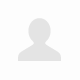
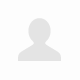
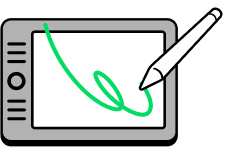
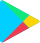
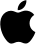
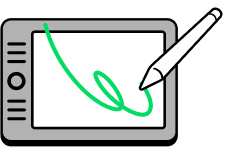
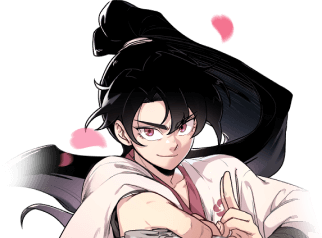
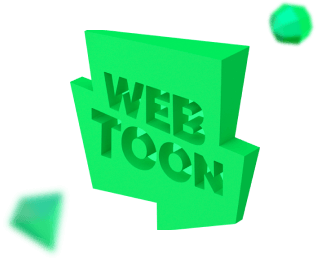

In [25]:
# webelement객체 내부의 html 소스코드 추출
# get_attribute('innerHTML')
id_elem.get_attribute('innerHTML')

In [26]:
id_elem.get_attribute('id')

'root'

In [27]:
sel = '#content > div:nth-child(2) > ul > li:nth-child(1) > div > a.ContentTitle__title_area--x24vt > span > span'

In [30]:
elem = driver.find_element(By.CSS_SELECTOR, sel)
elem.get_attribute('innerHTML')

'아빠는 N살'

In [ ]:
#content > div:nth-child(2) > ul > li:nth-child(1) > div
# #content : id가 content인 태그를 찾고
# div:nth-child(2) : div를 찾고 2번째 div를 선택
# ul :  태그 선택
# li:nth-child(1) : 모든 li태그를 찾고 첫번째 li태그를 선택
# div : div태그 선택

In [31]:
# id content인 태그의 두번째 자식 div태그안의 ul태그내의 모든 li태그 각 li의 div태그를 명시
sel = '#content > div:nth-child(2) > ul > li > div'
elem=driver.find_elements(By.CSS_SELECTOR, sel)

In [33]:
len(elem)

30

In [40]:
elem[0].get_attribute('innerHTML') # html태그 포함 반환
elem[0].get_attribute('innerText').split('\n') # 내부 text
elem[0].text.split('\n') # 내부 text

['UP', '아빠는 N살', '유영근', '별점', '9.90', '조회수', '5,065만']

In [37]:
elem[10].get_attribute('innerText').split('\n')

['일상다반사', '햄츄', '별점', '9.18', '조회수', '24만']

In [39]:
# 베스트도전 웹툰을 추출해서 df로 생성
# list에 df를 원소로 저장하고 저장된 모든 df를 concat으로 결합
result=[]

In [41]:
for e in elem :
    res = e.text.split('\n')
    if len(res) == 7 : #up 포함
        result.append(pd.DataFrame({'제목':res[1], '작가':res[2],'별점':res[4],'조회수':res[6]},
                                   index=range(0,1)))
    else :
        result.append(pd.DataFrame({'제목':res[0], '작가':res[1],'별점':res[3],'조회수':res[5]},
                                   index=range(0,1)))        
    

In [44]:
pd.concat(result).reset_index(drop=True)

,제목,작가,별점,조회수
0,아빠는 N살,유영근,9.90,"5,065만"
1,별의별,별가사리,9.04,3.5만
2,클리너,koku****,9.33,9.4만
3,정의를 위한 나라,류기호,9.50,6.3만
4,집에 핀 봄팡이,봄팡이,9.52,26만
5,조금 수상한 연애시뮬레이션,초록이슬,9.81,22만
6,허니허니2 - 느리지만 괜찮아,정수B,9.89,134만
7,찐삼국사,이용훈,8.10,21만
8,동화인 : 영웅들의 이야기,반다,8.43,"6,953"
9,잿빛마을과 방랑소녀,수은양,9.49,4.8만


In [45]:
driver.close()

### 동적 로그인 진행
- input box에 driver 통해서 값을 전달하는 방법
- 봇으로 판단되서 진행되지 않는 경우 캡챠를 피하는 방법
- **셀레니움을 통해서 javsscript 코드를 실행하는 방법**

In [51]:
# create_driver() 사용자 생성 함수, 윗쪽에서 생성
driver = create_driver()

In [52]:
url = 'https://nid.naver.com/nidlogin.login?mode=form&url=https://www.naver.com/'
driver.get(url)

In [65]:
# id값 전달
# id 입력하는 input box 찾기
id_elem = driver.find_element(By.ID,"id")
type(id_elem)

selenium.webdriver.remote.webelement.WebElement

- selenium.webdriver.remote.webelement.WebElement 객체
    - 객체 내부 content를 추출
    - 객체 자체를 핸들링하는것도 가능
        - click, clear, 값 입력(키보다 값 전달(send_keys))

In [54]:
id_elem.clear() # 기존값 지우기
id_elem.send_keys('') #키보드를 통해서 값을 전달하는 것과 같은 의미
# 값이 전달되는 위치:현재 커서가 있는 곳으로 값이 전달됨
# 값은 누적 전달 됨

In [55]:
id_elem.send_keys('')

In [66]:
# elem에 새로운 값을 전달하려면 기존 값을 반드시 지우고 값을 전달
id_elem.clear()
id_elem.send_keys('')

In [63]:
# 비밀번호 입력 input box 찾기
# xpath를 이용해 봄
xpath='//*[@id="pw"]'
pw_elem=driver.find_element(By.XPATH,xpath)
pw_elem.send_keys('')

In [67]:
# 로그인 버튼의 xpath
xpath='//*[@id="log.login"]'
login_btn=driver.find_element(By.XPATH,xpath)
login_btn.click()

- 대부분의 네이버 로그인은
    - 코드로 클릭하거나 값을 전달한 경우(send_keys(), click()) 크롤링 봇으로 보고 거부
    - 자동입력 방지문자(캡챠)기능이 실행을 함
    - 이런경우는 script 코드를 활용해서 키를 전달 또는 클릭 실행하는 방법을 사용

In [68]:
driver.close()

### webdriver 통해 script 코드 직접 실행
- driver.execute_script('script 코드') 함수 
    - driver로 script 코드를 직접 실행
- tip.session
    - 서버가 클라이언트를 관리하는 1개의 단위
    - 웹 접속인 경우 브라우저 탭 1개가 1개의 session(클라이언트)

In [77]:
id_input = ''
pw_input=''

In [70]:
driver = create_driver()

In [72]:
url='https://nid.naver.com/nidlogin.login?mode=form&url=https://www.naver.com/'

In [73]:
driver.get(url) # session1개 생성 : 네이버사이트

#### id/pass 입력하는 input 태그에 값을 설정하는 javascript 코드 생성
- 현재 active 페이지, 현재 ative 문서 : document
- document에서 태그객체를 찾는 함수 : getElementsByXXX('속성값') -> 반환값 배열
- 객체 내 값을 접근 : 객체.value

In [78]:
id_script = "document.getElementsByName('id')[0].value='"+id_input+"'"

In [79]:
pw_script = "document.getElementsByName('pw')[0].value='"+pw_input+"'"

In [81]:
# script 코드 확인
pw_script
id_script

"document.getElementsByName('id')[0].value='testmkm0515'"

In [84]:
# 자바스크립트 코드를 통해서 값을 전달
# 위 코드와 차이점은 위 코드는 send_keys()라는 셀레니움 함수(파이썬코드)
# 현재코드는 자바스크립트 코드가 값을 전달
driver.execute_script(id_script)
driver.execute_script(pw_script)

In [85]:
# 로그인 버튼 클릭
# 로그인 버튼의 xpath
xpath='//*[@id="log.login"]'
login_btn=driver.find_element(By.XPATH,xpath)
login_btn.click()

In [86]:
# 로그인 된 상태에서 메일 페이지 접근, 서버에게 페이지 재 요청
# 드라이버에 의해서 구동되고 있는 브라우저의 세션값이 같이 서버에게 전달되므로
# 로그인이 유지됨
driver.get("http://mail.naver.com")

In [87]:
driver.close()

#### 셀레니움 객체는 파싱/명령전달/스크립트 실행 모두 가능함